In [35]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
import time
import datetime
from sklearn.metrics import confusion_matrix

0.7121364092276831

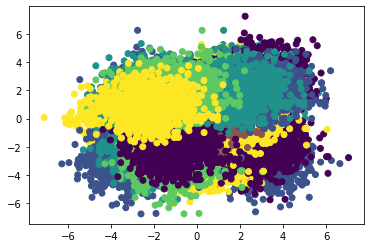

In [17]:
while True:
    noise = np.random.randn(997, 2)
    plt.scatter (noise[:,0], noise[:,1])
    
    cloud1 = noise + np.array([randint(-3, 3), randint(-3, 3)])
    cloud2 = noise + np.array([randint(-3, 3),randint(-3, 3)])
    cloud3 = noise + np.array([randint(-3, 3),randint(-3, 3)])
    cloud4 = noise + np.array([randint(-3, 3),randint(-3, 3)])
    cloud5 = noise + np.array([randint(-3, 3), randint(-3, 3)])

    X = np.vstack([cloud1, cloud2, cloud3, cloud4, cloud5])

    annot1 = [0] * cloud1.shape[0]
    annot2 = [1] * cloud2.shape[0]
    annot3 = [2] * cloud3.shape[0]
    annot4 = [3] * cloud4.shape[0]
    annot5 = [4] * cloud5.shape[0]
    y = annot1 +annot2 + annot3 + annot4 + annot5

    plt.scatter(X[:,0], X[:,1], c=y) 

    data, labels = shuffle(X, y)

    test_size = int(len(data) * 0.4)
    Xtrain = data[:test_size]
    Ytrain = labels[:test_size]
    Xtest = data[test_size:]
    Ytest = labels[test_size:]

    clf = LogisticRegression()
    clf.fit(Xtrain, Ytrain)

    predictions = clf.predict(Xtest)

    if accuracy_score(Ytest, predictions)>=0.704:
        if accuracy_score(Ytest, predictions)<=0.716:
            break
accuracy_score(Ytest, predictions)

In [23]:
K = 10
acurrance_all = []

#### Гауссовский наивный байесовский классификатор

In [38]:
def gaussian_nb (data, labels):
    time_gaussian_nb = []
    accur_gauss_nb = 0 
    
    scaler = MinMaxScaler()
    data1 = scaler.fit_transform(data)
    
    for i in range (K):
        data, labels = shuffle(data, labels)
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, labels, test_size=0.25)
        model = GaussianNB()
        model.fit(Xtrain, Ytrain)
        
        start_time = time.time()
       
        pred = model.predict(Xtest)
        
        time1 = time.time() - start_time
      
        time_gaussian_nb.append(time1/len(Ytest))
        accur_gauss_nb += np.mean(pred == Ytest)
        
    
    std_gaussian_nb = np.std(time_gaussian_nb)
    accur_gauss_nb = accur_gauss_nb/K
    
    
    print ('ОТЧЕТ 1. Гауссовский наивный байесовский классификатор ')
    print('среднеквадратическое отклонение по времени = ', std_gaussian_nb)
    print ('средняя точность классификации = ', round(accur_gauss_nb*100, 2), '%')
    
    #evaluate(model.predict(Xtest), Ytest)
    #print(time_gaussian_nb)
    conf_mat = confusion_matrix(Ytest, pred)
    print(conf_mat)
    acurrance_all.append(('Гауссовский классификатор', accur_gauss_nb, std_gaussian_nb, time_gaussian_nb))

In [39]:
gaussian_nb (data, labels)

ОТЧЕТ 1. Гауссовский наивный байесовский классификатор 
среднеквадратическое отклонение по времени =  3.123398724572878e-07
средняя точность классификации =  72.39 %
[[252   0   2   1   8]
 [  1 145  81   1   0]
 [  2  78 153  15   0]
 [  3   0  13 169  53]
 [ 14   0   2  52 202]]


#### Полиномиальный наивный байесовский классификатор

In [40]:
def multinomial_nb (data, labels):
    time_multinomial_nb = []
    accur_multinomial_nb = 0 
    
    scaler = MinMaxScaler()
    
    data1 = scaler.fit_transform(data)
       
    for i in range (K):
        data1, labels = shuffle(data1, labels)
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(data1, labels, test_size=0.25)
        
        model = MultinomialNB()
        
        model.fit(Xtrain, Ytrain)
        
        start_time = time.time()
       
        pred = model.predict(Xtest)
        
        time2 = time.time() - start_time
                
        time_multinomial_nb.append(time2/len(Ytest))
        accur_multinomial_nb += np.mean(pred == Ytest)
        
    std_multinomial_nb = np.std(time_multinomial_nb)
    accur_multinomial_nb = accur_multinomial_nb/K
    
    print ('ОТЧЕТ 2. Полиномиальный наивный байесовский классификатор ')
    print('среднеквадратическое отклонение по времени = ', std_multinomial_nb)
    print ('средняя точность классификации = ', round(accur_multinomial_nb*100, 2), '%')
   
    conf_mat = confusion_matrix(Ytest, pred)
    print(conf_mat)
    acurrance_all.append(('Полиномиальный классификатор', accur_multinomial_nb, std_multinomial_nb, time_multinomial_nb))

In [41]:
multinomial_nb (data, labels)

ОТЧЕТ 2. Полиномиальный наивный байесовский классификатор 
среднеквадратическое отклонение по времени =  7.239508546527659e-08
средняя точность классификации =  38.37 %
[[  0 219   0   0  48]
 [  0 212  11   0  17]
 [  0 172  13   0  61]
 [  0  15   0   0 260]
 [  0  10   0   0 209]]


#### Комплементарный наивный байесовский классификатор

In [42]:
def complement_nb (data, labels):
    time_complement_nb = []
    accur_complement_nb = 0 
    
    scaler = MinMaxScaler()
    data1 = scaler.fit_transform(data)
    
    for i in range (K):
        data1, labels = shuffle(data1, labels)
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(data1, labels, test_size=0.25)
        model = ComplementNB()
        model.fit(Xtrain, Ytrain)
        
        start_time = time.time()
       
        pred = model.predict(Xtest)
        
        time1 = time.time() - start_time
        time_complement_nb.append(time1/len(Ytest))
        accur_complement_nb += np.mean(pred == Ytest)
        
    std_complement_nb = np.std(time_complement_nb)
    accur_complement_nb = accur_complement_nb/K
    
    
    print ('ОТЧЕТ 3. Комплементарный наивный байесовский классификатор ')
    print('среднеквадратическое отклонение по времени = ', std_complement_nb)
    print ('средняя точность классификации = ', round(accur_complement_nb*100, 2), '%')

    conf_mat = confusion_matrix(Ytest, pred)
    print(conf_mat)
    acurrance_all.append(('Комплементарный классификатор', accur_complement_nb, std_complement_nb, time_complement_nb))

In [43]:
complement_nb (data, labels)

ОТЧЕТ 3. Комплементарный наивный байесовский классификатор 
среднеквадратическое отклонение по времени =  1.1148758602943891e-08
средняя точность классификации =  37.07 %
[[  0 221   0   0  24]
 [  0 240   0   0  18]
 [  0 183   0   0  71]
 [  0  16   0   0 231]
 [  0   7   0   0 236]]


#### Наивный байесовский классификатор Бернулли

In [44]:
def bernoulli_nb (data, labels):
    time_bernoulli_nb = []
    accur_bernoulli_nb = 0 
    
    scaler = MinMaxScaler()
    data1 = scaler.fit_transform(data)
    
    for i in range (K):
        data1, labels = shuffle(data1, labels)
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(data1, labels, test_size=0.25)
        model = BernoulliNB()
        model.fit(Xtrain, Ytrain)
        
        start_time = time.time()
       
        pred = model.predict(Xtest)
        
        time1 = time.time() - start_time
        time_bernoulli_nb.append(time1/len(Ytest))
        accur_bernoulli_nb += np.mean(pred == Ytest)
        
    std_bernoulli_nb = np.std(time_bernoulli_nb)
    accur_bernoulli_nb = accur_bernoulli_nb/K
    
    print ('ОТЧЕТ 3. Наивный байесовский классификатор Бернулли ')
    print('среднеквадратическое отклонение по времени = ', std_bernoulli_nb)
    print ('средняя точность классификации = ', accur_bernoulli_nb)

    conf_mat = confusion_matrix(Ytest, pred)
    print(conf_mat)
    acurrance_all.append(('Классификатор Бернулли', accur_bernoulli_nb, std_bernoulli_nb, time_bernoulli_nb))

In [45]:
bernoulli_nb (data, labels)

ОТЧЕТ 3. Наивный байесовский классификатор Бернулли 
среднеквадратическое отклонение по времени =  3.515045605863542e-08
средняя точность классификации =  0.18732959101844426
[[  0   0 257   0   0]
 [  0   0 257   0   0]
 [  0   0 235   0   0]
 [  0   0 254   0   0]
 [  0   0 244   0   0]]


### Определить классификатор, имеющий наибольшую точность.


In [47]:
maxim = 0

for i in range (len(acurrance_all)):
    if acurrance_all[i][1] > maxim:
        maxim = acurrance_all[i][1]
        klass_max = acurrance_all[i][0]
          
print ('классификатор, имеющий наибольшую точность: ', klass_max)
print('Точность = ', round(maxim, 2*100), '% ')

классификатор, имеющий наибольшую точность:  Гауссовский классификатор
Точность =  0.723897353648757 % 


### Построить гистограммы производительности для всех классификаторов, разместив их на одном графике;

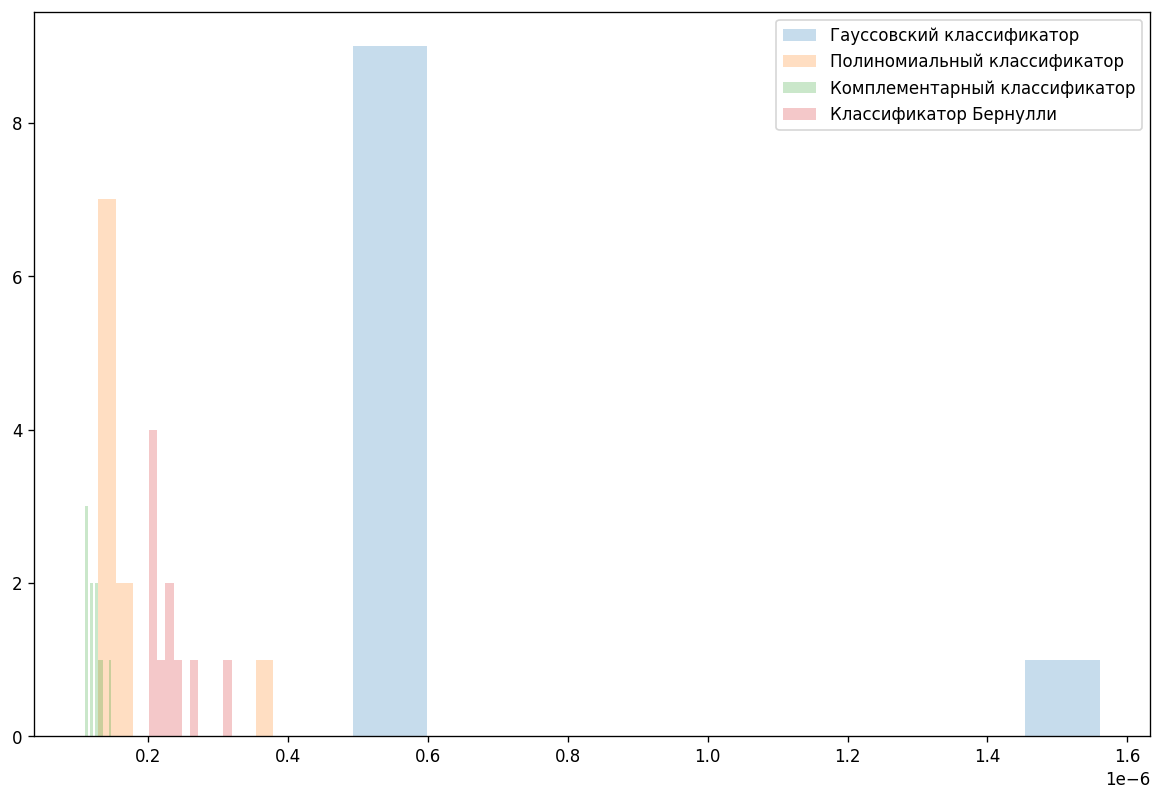

In [49]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), dpi=120)
bins = 10
ax1.hist(acurrance_all[0][3], bins, alpha=0.25, label = acurrance_all[0][0])
ax1.hist(acurrance_all[1][3], bins, alpha=0.25, label = acurrance_all[1][0])
ax1.hist(acurrance_all[2][3], bins, alpha=0.25, label = acurrance_all[2][0])
ax1.hist(acurrance_all[3][3], bins, alpha=0.25, label = acurrance_all[3][0])

ax1.legend(loc='upper right')

### Определить классификатор с наиболее стабильной производительностью. В качестве критерия стабильности использовать дисперсию времени, затраченного на классификацию одного экземпляра данных (одна точка):

In [51]:
minim = 1
for i in range (len(acurrance_all)):
    if acurrance_all[i][2] < minim:
        minim = acurrance_all[i][2]
        klass_min = acurrance_all[i][0]
    
print ('классификатор с наиболее стабильной производительностью: ', klass_min)
print('Дисперсия времени = ', minim)

классификатор с наиболее стабильной производительностью:  Комплементарный классификатор
Дисперсия времени =  1.1148758602943891e-08
